PROTOTIPO PARA DETERMINAR EL ESTADO DE SALUD EN EL ÁRBOL DE MANZANA MEDIANTE EL USO DE REDES NEURONALES.

In [ ]:
 # Para la implementacion del modelo en la AMB82 es necesaria la version 2.14.1
!pip install tensorflow==2.14.1
import tensorflow as tf
print(tf.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: google-auth-oauthlib
    Found existing ins

In [ ]:
import tensorflow as tf
print(tf.__version__) # Se imprime la version de tensorflow con la que se configura el cuaderno de trabajo

2.14.1


In [13]:
from google.colab import drive # se utiliza drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
#Se importan las librerias para el modelo
import tensorflow as tf
import keras
from keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from keras.applications import MobileNetV2
from keras.models import Model
# Se importan las librerias para el dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# se importan las librerias para las métricas
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import applications
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense

In [15]:

# Definimos el tamaño de las imágenes y el tamaño del lote
image_size = 224
batch_size = 32

# Se crea un generador de datos de imágenes para el entrenamiento con ImageDataGenerator
train_generator = ImageDataGenerator()

#  Se crea un generador de datos de imágenes para las imágenes de validacion con ImageDataGenerator
valid_generator = ImageDataGenerator()
#  Se crea un generador de datos de imágenes para las imágenes de prueba con ImageDataGenerator
test_generator = ImageDataGenerator()

#Se cargan  las imágenes de entrenamiento desde el directorio especificado
train = train_generator.flow_from_directory(
    '/content/drive/MyDrive/cuadernos Trabajo de grado/Basedata/Basedata/train', # Ruta al directorio de entrenamiento en drive
    target_size = (image_size, image_size), # Se define el tamaño al que se redimensionarán todas las imágenes
    batch_size = batch_size, # Se define el tamaño del lote
    shuffle = True, # Se define  si se barajarán aleatoriamente las imágenes en cada lote
    class_mode = 'categorical' # Se defines el modo de clasificación categórica
)

# Se cargan  las imágenes de validación desde el directorio especificado
validation = valid_generator.flow_from_directory(
    '/content/drive/MyDrive/cuadernos Trabajo de grado/Basedata/Basedata/valid', # Ruta al directorio de validación en drive
    target_size = (image_size, image_size), #Se defineel tamaño al que se redimensionarán todas las imágenes
    shuffle = False, # Se define si se barajarán aleatoriamente las imágenes en cada lote
    batch_size = batch_size, # Se define el tamaño del lote
    class_mode = 'categorical' # Se define el modo de clasificación categórica
)



# Se cargan las imágenes de prueba desde el directorio especificado
test = test_generator.flow_from_directory(
    '/content/drive/MyDrive/cuadernos Trabajo de grado/Basedata/Basedata/test', # Ruta al directorio de prueba en drive
    target_size = (image_size, image_size), # Se define el tamaño al que se redimensionarán todas las imágenes
    shuffle = False, # Se define  si se barajarán aleatoriamente las imágenes en cada lote
    batch_size = batch_size, # Se define el tamaño del lote
    class_mode='categorical' # Se define el modo de clasificación categórica
)



Found 8925 images belonging to 5 classes.
Found 2473 images belonging to 5 classes.
Found 973 images belonging to 5 classes.


In [16]:
train.class_indices # se muestran las clases

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___healthy': 2,
 'Apple_aranita': 3,
 'Apple_escarabajo': 4}

In [17]:
# Se define la cantidad de canales de la imagen
rgb = 3

# Se crea un modelo utilizando la arquitectura MobileNetV2 pre-entrenada
base_model = MobileNetV2(
    weights="imagenet",  # Se Usan los pesos pre-entrenados en ImageNet
    include_top=False,  # No se incluye la capa fully-connected
    input_shape=(image_size, image_size, rgb)  # Se define el tamaño de las imágenes de entrada
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [20]:
#Creacion del modelo

# Se asigna la salida de la última capa del modelo
x =base_model.output


x = layers.Flatten()(x)# Se crea una capa de aplanamiento


x = layers.Dense(64, activation='relu', kernel_initializer='he_uniform')(x)# Se crea una capa densa con 64 Neuronas
x = layers.BatchNormalization()(x) # se crea una capa de normalizacion


x = layers.Dropout(0.2)(x)# Capa de Dropout para evitar el sobreajuste


outputs = layers.Dense(5, activation="softmax", kernel_initializer='glorot_uniform')(x)# Se crea una capa de salida con 5 neuronas que corresponen al numero de clases  con activación softmax


modelv5 = keras.Model(inputs=base_model.input, outputs=outputs, name="modelo_v5")# Crear el modelo


for layer in base_model.layers[:-5]:# Establece todas las capas del modelo como no entrenables, excepto las últimas cinco capas
	 layer.trainable = False

# Resumen del modelo
modelv5.summary()

# Grafica la estructura del modelo
keras.utils.plot_model(modelv5, "modelo_MovileNetv2.png", show_shapes=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#compilacion

modelv5.compile(optimizer= keras.optimizers.Adam(learning_rate=0.001),
 loss= keras.losses.CategoricalCrossentropy(),
metrics=["accuracy"]) # Se compila el modelo  con optimizador Adam y taza da aprendizaje 0.001
 # se utiliza la metrica de precision para evaluar el rendimiento durante el entrenamiento


In [ ]:
#callbacks
earlystopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',            # La métrica que se va a monitorear para detener el entrenamiento
    patience=5,                    # Se define número de épocas que esperará antes de detener el entrenamiento
    verbose=1,                     # Se define el  nivel de detalle que se mostrará durante el entrenamiento
    restore_best_weights=True
)

In [ ]:
#reducir la tasa de aprendizaje
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',           # La métrica que se va a monitorear para reducir la tasa de aprendizaje
    factor=0.2,                   # Factor de reducción de la tasa de aprendizaje
    patience=2,                   # El número de épocas que esperará antes de reducir la tasa de aprendizaje
    verbose=1                     # El nivel de detalle que se mostrará durante el entrenamiento
)

In [ ]:
#Entrenamiento del modelo
history =modelv5.fit(
    train,
    batch_size = batch_size,
    validation_data = validation,
    epochs = 30,
    callbacks = [earlystopping, reduce_lr],
    )

Epoch 1/30
92/92 [==============================] - 695s 7s/step - loss: 0.4281 - accuracy: 0.8490 - val_loss: 10.9311 - val_accuracy: 0.2095 - lr: 0.0010
Epoch 2/30
92/92 [==============================] - 197s 2s/step - loss: 0.1105 - accuracy: 0.9657 - val_loss: 6.6757 - val_accuracy: 0.2309 - lr: 0.0010
Epoch 3/30
92/92 [==============================] - 189s 2s/step - loss: 0.0615 - accuracy: 0.9828 - val_loss: 1.3744 - val_accuracy: 0.6926 - lr: 0.0010
Epoch 4/30
92/92 [==============================] - 194s 2s/step - loss: 0.0488 - accuracy: 0.9883 - val_loss: 2.5753 - val_accuracy: 0.4077 - lr: 0.0010
Epoch 5/30
92/92 [==============================] - ETA: 0s - loss: 0.1810 - accuracy: 0.9372
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
92/92 [==============================] - 195s 2s/step - loss: 0.1810 - accuracy: 0.9372 - val_loss: 4.1013 - val_accuracy: 0.3829 - lr: 0.0010
Epoch 6/30
92/92 [==============================] - 195s 2s/step - lo

In [ ]:
#evaluar el modelo
scores = modelv3.predict(test)
print(scores)

31/31 [==============================] - 338s 11s/step
[[9.71377134e-01 2.70601343e-02 4.70568601e-04 6.88632485e-04
  4.03403683e-04]
 [5.56106329e-01 1.24630645e-01 3.18033040e-01 5.63433336e-04
  6.66528358e-04]
 [5.95854642e-03 9.86499548e-01 2.75267055e-04 4.98748105e-03
  2.27906439e-03]
 ...
 [2.07842982e-06 1.04637671e-04 3.98903831e-06 4.91125043e-04
  9.99398112e-01]
 [1.93927117e-04 3.20486251e-05 2.99789564e-04 7.84878444e-04
  9.98689353e-01]
 [2.21114351e-05 2.89642394e-05 4.92125873e-05 7.24353653e-04
  9.99175370e-01]]


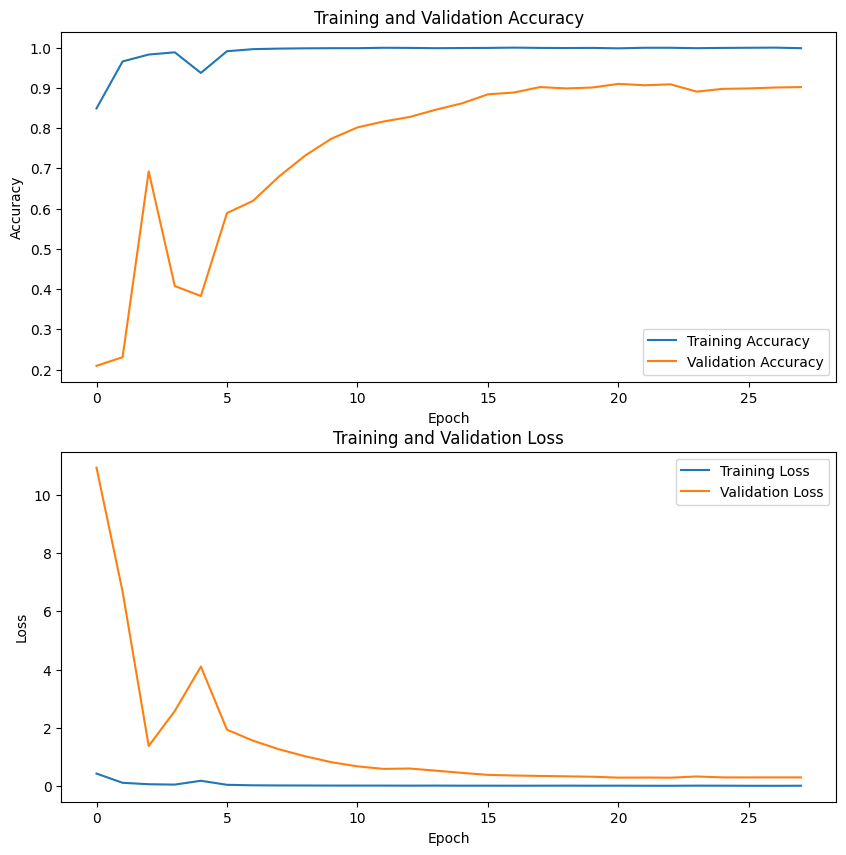

In [ ]:
#graficas modelo

# Se crea una figura con dos imagenes
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)

# Se grafica la precisión de entrenamiento y validación
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Se añaden nombres a los ejes y se agrega una leyenda y un título a la imagen
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Se crea la segunda imagen
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Se añaden nombres a los ejes y se agrega una leyenda y un título a la imagen
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Se muestran los gráficos
plt.show()

27/27 [==============================] - 180s 7s/step


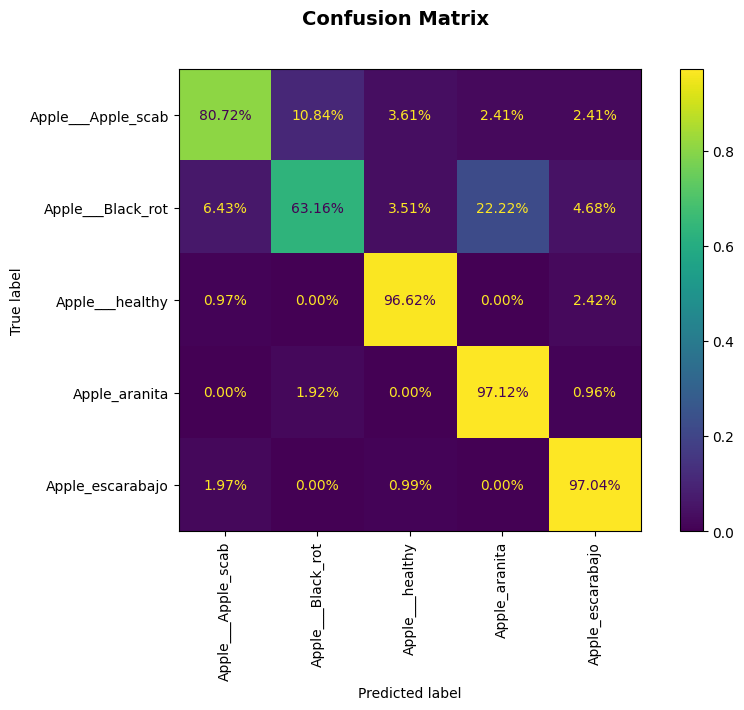

In [ ]:
#matriz de confusion
#Se generan  predicciones en el conjunto de prueba
predictions = modelv5.predict(test)
predicted_classes = np.argmax(predictions, axis=1)

# Se obtienen  las clases verdaderas y las etiquetas de las clases
true_classes = test.classes
class_labels = list(test.class_indices.keys())

# Calcular la matriz de confusión normalizada
cm = confusion_matrix(
    y_true=true_classes,
    y_pred=predicted_classes,
    normalize='true')

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(10, 6))
disp.plot(include_values=True, cmap="viridis", ax=ax, xticks_rotation="vertical", values_format=".2%")

# Configurar el título del gráfico
fig.suptitle("Confusion Matrix", fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()

In [ ]:
#metricas
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                    precision    recall  f1-score   support

Apple___Apple_scab       0.89      0.81      0.85       166
 Apple___Black_rot       0.84      0.63      0.72       171
   Apple___healthy       0.93      0.97      0.95       207
     Apple_aranita       0.71      0.97      0.82       104
  Apple_escarabajo       0.92      0.97      0.94       203

          accuracy                           0.87       851
         macro avg       0.86      0.87      0.86       851
      weighted avg       0.87      0.87      0.87       851



In [ ]:
modelv5.save('modeloAMB.h5', include_optimizer=False) # se guarda el modelo teniendo en cuenta los requerimientos para cargar el modelo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
